In [5]:
pip install pillow

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


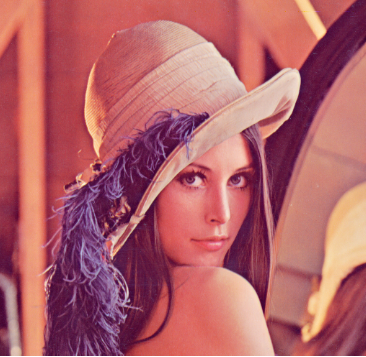

In [2]:
from PIL import Image
# display image in colab
image_colored = Image . open ("/content/drive/MyDrive/Artificial Intelligence and Machine Learning/leena_image.png")
display ( image_colored )

In [3]:
import numpy as np
# Convert the Pillow image to a NumPy array
image_array_colored = np . array ( image_colored )
# Display the shape of the NumPy array (height , width , channels )
print (" Shape of the image array :", image_array_colored .shape )

 Shape of the image array : (357, 366, 3)


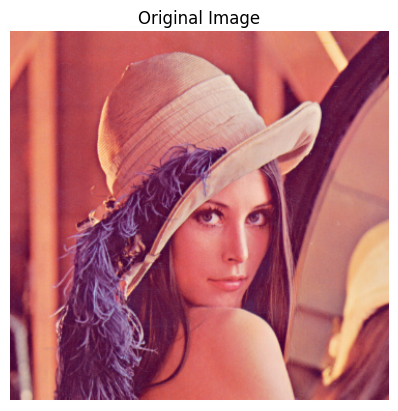

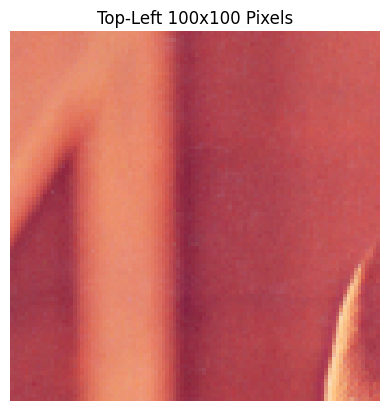

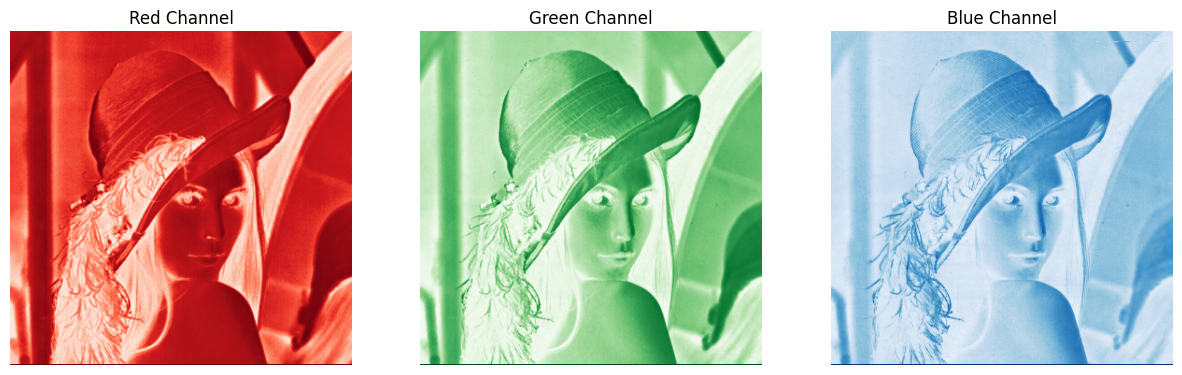

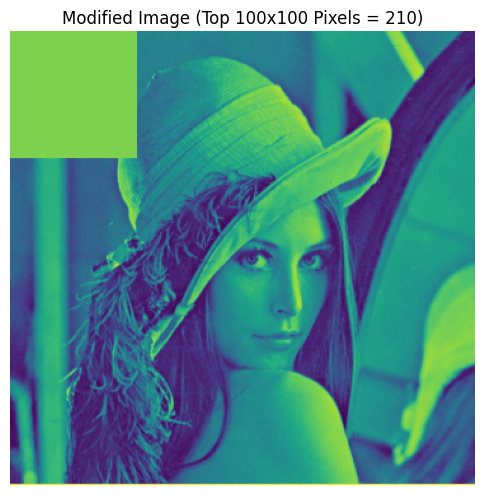

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 1. Read and display the image
image_path = '/content/drive/MyDrive/Artificial Intelligence and Machine Learning/leena_image.png'  # Replace with the actual path of the image
image = Image.open(image_path)
image.show()
plt.imshow(image)
plt.axis('off')
plt.title("Original Image")
plt.show()

# 2. Display only the top-left corner of 100x100 pixels
image_np = np.array(image)
top_left_corner = image_np[:100, :100]
plt.imshow(top_left_corner)
plt.axis('off')
plt.title("Top-Left 100x100 Pixels")
plt.show()

# 3. Show the three color channels (R, G, B)
R = image_np[:, :, 0]
G = image_np[:, :, 1]
B = image_np[:, :, 2]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(R, cmap='Reds')
ax[0].set_title('Red Channel')
ax[0].axis('off')

ax[1].imshow(G, cmap='Greens')
ax[1].set_title('Green Channel')
ax[1].axis('off')

ax[2].imshow(B, cmap='Blues')
ax[2].set_title('Blue Channel')
ax[2].axis('off')

plt.show()

# 4. Modify the top 100 × 100 pixels to a value of 210
modified_image = image_array.copy()
modified_image[:100, :100] = 210  # Set top-left 100x100 pixels to light gray

plt.figure(figsize=(6, 6))
plt.imshow(modified_image)
plt.axis("off")
plt.title("Modified Image (Top 100x100 Pixels = 210)")
plt.show()

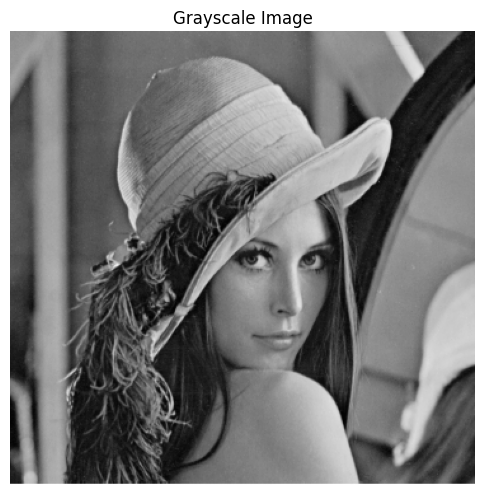

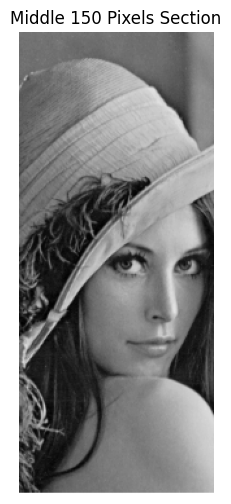

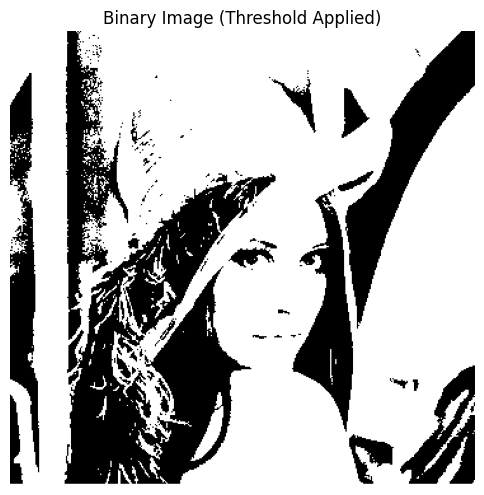

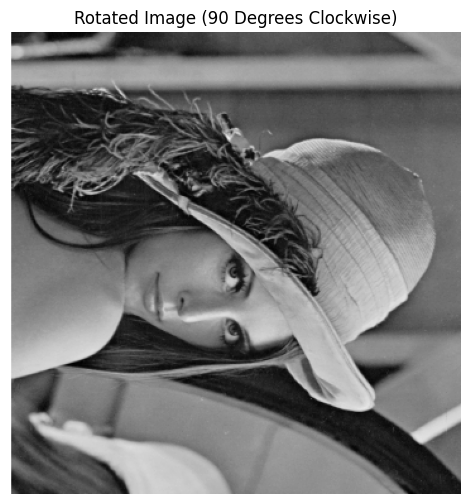

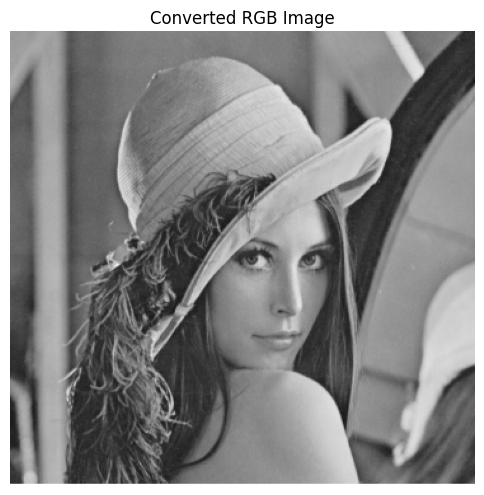

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and display a grayscale image
image_path = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/leena_image.png"  # Change this to your grayscale image file
gray_image = Image.open(image_path).convert("L")

plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap="gray")
plt.axis("off")
plt.title("Grayscale Image")
plt.show()

# 2. Extract and display the middle section of the image (150 pixels)
gray_array = np.array(gray_image)
height, width = gray_array.shape
middle_section = gray_array[:, width // 2 - 75: width // 2 + 75]  # Extract center 150 pixels

plt.figure(figsize=(6, 6))
plt.imshow(middle_section, cmap="gray")
plt.axis("off")
plt.title("Middle 150 Pixels Section")
plt.show()

# 3. Apply a simple threshold to the image (binary conversion)
binary_image = np.where(gray_array < 100, 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(binary_image, cmap="gray")
plt.axis("off")
plt.title("Binary Image (Threshold Applied)")
plt.show()

# 4. Rotate the image 90 degrees clockwise
rotated_image = np.rot90(gray_array, k=-1)  # Rotate 90 degrees clockwise

plt.figure(figsize=(6, 6))
plt.imshow(rotated_image, cmap="gray")
plt.axis("off")
plt.title("Rotated Image (90 Degrees Clockwise)")
plt.show()

# 5. Convert the grayscale image to an RGB image
rgb_image = np.stack([gray_array] * 3, axis=-1)  # Replicate grayscale values across RGB channels

plt.figure(figsize=(6, 6))
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Converted RGB Image")
plt.show()

3. Image Compression and Decompression using PCA.
In this exercise, build a PCA from scratch using explained variance method for image compression task.
You are expected to compute the necessary matrices from the scratch. Dataset: Use image of your
choice.
1. Load and Prepare Data:
• Fetch an image of you choice.{If colour convert to grayscale}
• Center the dataset - Standaridze the Data.
• Calculate the covaraince matrix of the Standaridze data.
2. Eigen Decomposition and Identifying Principal Components:
• Compute Eigen Values and Eigen Vectors.
• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
the highest eigenvalues.
• Identify the Principal Components with the help of cumulative Sum plot.
3. Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

• Display the Results and Evaluate.

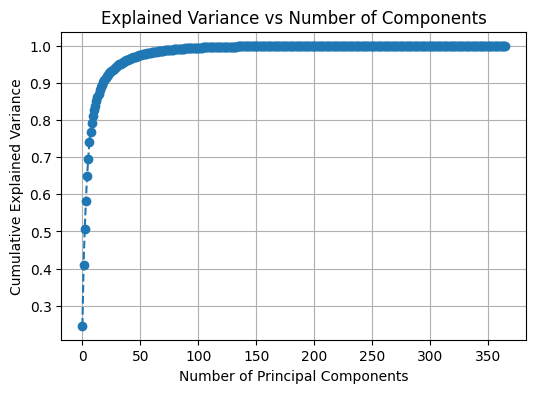

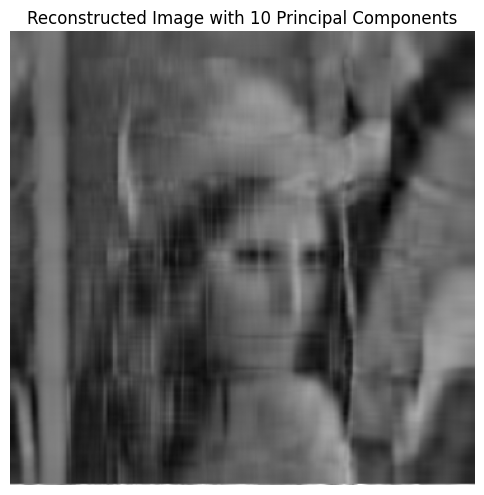

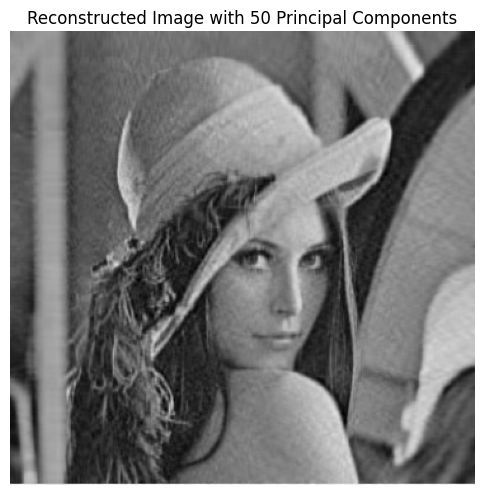

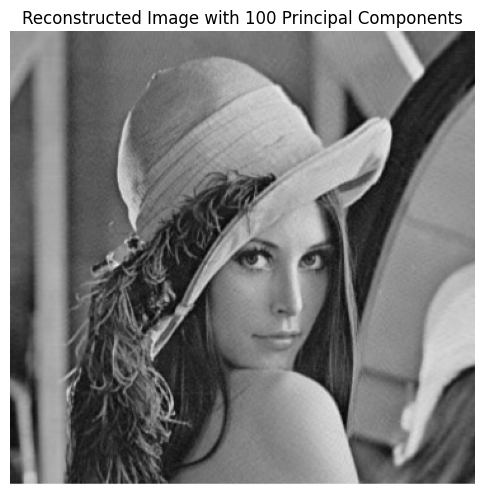

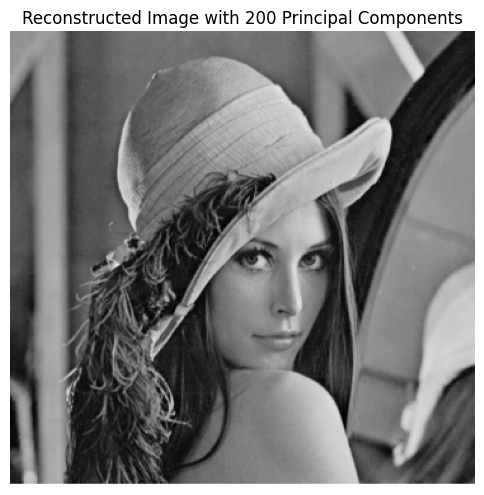

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare data
image_path = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/leena_image.png"  # Change this to your image file
image = Image.open(image_path).convert("L")
image_array = np.array(image, dtype=np.float64)

# Standardize the data (Centering the dataset)
mean = np.mean(image_array, axis=0)
standardized_image = image_array - mean

# Compute the covariance matrix
cov_matrix = np.cov(standardized_image, rowvar=False)

# Eigen Decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Identify principal components with cumulative sum plot
explained_variance_ratio = np.cumsum(eigenvalues) / np.sum(eigenvalues)
plt.figure(figsize=(6, 4))
plt.plot(explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.grid()
plt.show()

# Reconstruction and Experiments
for k in [10, 50, 100, 200]:  # Different combinations of PCs
    top_k_eigenvectors = eigenvectors[:, :k]
    reduced_data = np.dot(standardized_image, top_k_eigenvectors)
    reconstructed_image = np.dot(reduced_data, top_k_eigenvectors.T) + mean

    plt.figure(figsize=(6, 6))
    plt.imshow(reconstructed_image, cmap="gray")
    plt.axis("off")
    plt.title(f"Reconstructed Image with {k} Principal Components")
    plt.show()